### Period of an anharmonic oscillator

The simple harmonic oscillator crops up in many places.  Its
behavior can be studied readily using analytic methods and it has the
important property that its period of oscillation is a constant,
independent of its amplitude, making it useful, for instance, for keeping
time in watches and clocks.  Frequently in physics, however, we also come
across anharmonic oscillators, whose period varies with amplitude and whose
behavior cannot usually be calculated analytically.

A general classical oscillator can be thought of as a particle in a concave
potential well.  When disturbed, the particle will rock back and forth in
the well.

The harmonic oscillator corresponds to a quadratic potential $V(x) \propto
x^2$.  Any other form gives an anharmonic oscillator.  (Thus there are many
different kinds of anharmonic oscillator, depending on the exact form of
the potential.)

One way to calculate the motion of an oscillator is to write down the
equation for the conservation of energy in the system.  If the particle has
mass $m$ and position $x$, then the total energy is equal to the sum of the
kinetic and potential energies thus:

$
E = \frac{1}{2} m \biggl( { dx\over dt} \biggr)^2 + V(x).
$

Since the energy must be constant over time, this equation is effectively a
(nonlinear) differential equation linking $x$ and $t$.

Let us assume that the potential $V(x)$ is symmetric about $x=0$ and let us
set our anharmonic oscillator going with amplitude $a$.  That is, at $t=0$
we release it from rest at position $x=a$ and it swings back towards the
origin.  Then at $t=0$ we have $dx/dt = 0$ and the equation above
reads $E = V(a)$, which gives us the total energy of the particle in terms
of the amplitude.

1. When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator.  By rearranging the equation above for $dx/dt$ and then integrating with respect to $t$ from 0 to $\frac{1}{4} T$, show that the period $T$ is given by $ T = \sqrt{8m} \int_0^a {dx\over\sqrt{V(a)-V(x)}}$. Do this using the "Markdown" mode of Jupyter notebook and Latex for equations. Look at the Markdown code for this section for hints, and do some Google searching. *This portion is worth 5 extra-credit points*
2. Suppose the potential is $V(x)=x^4$ and the mass of the particle is $m=1$.  Write a Python function that calculates the period of the oscillator for given amplitude $a$ using Gaussian quadrature of order 20, then use your function to make a graph of the period for amplitudes ranging from $a=0$ to $a=2$.
3. You should find that the oscillator gets faster as the amplitude increases, even though the particle has further to travel for larger amplitude.  And you should find that the period diverges as the amplitude goes to zero.  How do you explain these results? Make sure to answer this, use a Markdown section to write a clear statement.

Notes: Recall that scipy.integrate has fixed_quad which will use Gaussian quadrature of a desired order to integrate. Do not do the integration at $a = 0$, it diverges. Make your plot as clear as possible for full credit.

#### Extra Credit: Show Integration

TODO: ...


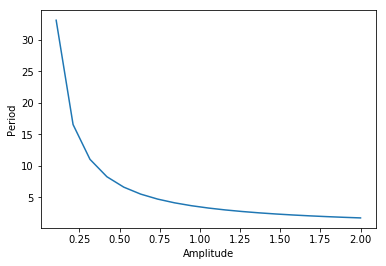

In [34]:
%matplotlib inline

import scipy as sp
import numpy as np
import pylab as plt

# the function integrated in 1.1, solving for period as a function of amplitude
def T(f, m, a):
    # handle divergance at 0
    if(a==0):
        return float('inf')
    
    # the easy part of the math
    result = np.sqrt(8 * m)
    
    # the hard math
    # inner function to be integrated
    inner = lambda x, a, V: 1 / np.sqrt(V(a) - V(x))
    # used to wrap the inner function and pass along f and a elegantly
    wrap = lambda x: inner(x, a, f)
    # integrate over range
    integrand = sp.integrate.fixed_quad(wrap, 0, a)
    result *= integrand[0]
    return result

# our given conditions
V = lambda x: x**4
m = 1

a1 = 0.0
a2 = 2.0
n = 20


# define the space over the amplitude
a = np.linspace(a1, a2, num=n)

# construct the function f to be T with our V and m, enables passing to map where lst is each a
f = lambda lst: T(V, m, lst)

# our period results, should be 
t = list(map(f, a))

# do plot stuff
plt.plot(a, t)
plt.xlabel('Amplitude')
plt.ylabel('Period')
plt.show()

#### Explanation of Behavior

As we see, as the Amplitude of the ocilator increase, our Period gets shorter. That being, it is ocilating faster. This is due to conservation of energy. The divertance at 0 is explained by the partical reaching rest at the bottom of the well. As the amplitude of the ocilation goes to zero, the peroid of that ocilation is forever. This is when all of the particals energy has been converted to potential.

### Electric field of a charge distribution

Suppose we have a distribution of charges and we want to calculate
the resulting electric field.  One way to do this is to first calculate the
electric potential $\phi$ and then take its gradient.  For a point
charge $q$ at the origin, the electric potential at a distance $r$ from the
origin is $\phi=q/4\pi\epsilon_0 r$. Several point chanrges would be the sum of this formula applied to each charge in turn. The corresponding electric field is $\vec{E} =
-\nabla\phi$. The divergence operator is $\nabla = \frac{\partial }{\partial x} \mathbf{i} + \frac{\partial}{\partial y}\mathbf{j}$, where $\mathbf{i}$ is a unit vector in the $x$ direction, and $\mathbf{j}$ is the unit vector in the $y$ direction.

1. You have two charges, of $\pm1\,$C, $10\,$cm apart.  Calculate the
  resulting electric potential on a $1\,\textrm{m}\times1\,\textrm{m}$
  square plane surrounding the charges and passing through them.  Calculate
  the potential at $1\,$cm spaced points in a grid and make a
  visualization on the screen of the potential using a density plot.
2. Now calculate the partial derivatives of the potential with respect
  to $x$ and $y$ and hence find the electric field in the $xy$ plane.  Make
  a visualization of the field also.  This is a little trickier than
  visualizing the potential, because the electric field has both magnitude
  and direction. Use the quiver method in matplotlib, drawing a grid of arrows with
  direction and length chosen to represent the field.

Notes: The potential diverges when the charge rests on grid point. Avoid this by locating the charges off your grid points. Go back to the previous homework for functions to compute derivatives. Supposing you have E, the magnitude of the electric field, scale Ex and Ey with:

r = E/40

Ex[r>1]/=r[r>1]

Ey[r>1]/=r[r>1]

This will make the vector field easier to visualize, particularly if you limit the range of points plotted with

plb.quiver(Ex[30:70,30:70],Ey[30:70,30:70])

To compute the potential of a charge, suppose you have grids representing x and y, from meshgrid. Call them x and y, respectively. If the charge is at point p = (-0.049,0), then sqrt((x - p[0])\*\*2 + (y-p[1])\*\*2) is the distance from each mesh point to the charge. That is $r$ in the formula for the potential.

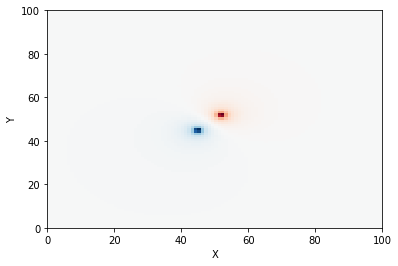

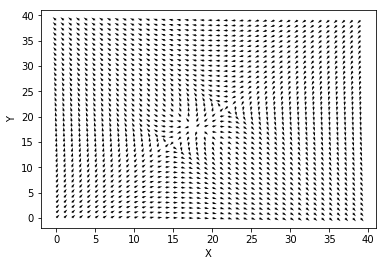

In [67]:
%matplotlib inline

import scipy as sp
import numpy as np
import pylab as plt

def dfdx(f, dx=1):
    df = np.zeros(f.shape)
    df[1:-1,:] = (f[:-2,:] - f[2:,:]) / (2 * dx)
    df[0,:] = (f[1,:] - f[0,:]) / dx # left edge
    df[-1,:] = (f[-1,:] - f[-2,:]) / dx # right edge
    return df
    
def dfdy(f, dy=1):
    df = np.zeros(f.shape)
    df[:,1:-1] = (f[:,:-2] - f[:,2:]) / (2 * dy)
    df[:,0] = (f[:,1] - f[:,0]) / dy # top edge
    df[:,-1] = (f[:,-1] - f[:,-2]) / dy # bottom edge
    return df

# system epsilon, use to handle edge case of divergance on point (tolerance for math)
eps_sys = np.finfo(float).eps

# vaccum permiability constant
eps_not = 8.854187817620e-12

# q is amount of charge, r is distance from euclidean center
potential = lambda q, r: (q / (4 * np.pi * eps_not * r))

divergance = lambda i, j, dx=0, dy=0: i * dx + j * dy

mesh_euclidian = lambda x, y, c: np.absolute( np.sqrt((x - c[0])**2 + (y - c[1])**2) ) 

# calculate the elctrical field about a change on a plane
def field(xplane, yplane, charge):
    # handle edge case? (divergance when charge on point)
#     if(): # skipped doing this because i didnt run into it, but check if dif < eps_sys
#         return float('inf')
    i = charge[0] * np.cos(np.deg2rad(45))# calculate unit vector in x and y direction!!!!
    j = charge[1] * np.sin(np.deg2rad(45))# j is y!
    q = charge[2] # just a charge quantity
    r = mesh_euclidian(xplane, yplane, charge[:2])
    phi = potential(q, r)
    dx = dfdx(phi)
    dy = dfdy(phi)
    Ex = (-1 *  divergance(i, j, dx=dx) * phi)
    Ey = (-1 *  divergance(i, j, dy=dy) * phi)
    return Ex, Ey, phi


a = 0.0 # bounds of plane in meters
b = 1.0
n = 100 # point mesh size, 100 per meter, i.e. 1cm

d = 0.1 # points are 10cm from eachother, 0.1m
s = (b - a - d) / 2 #calculate nicely centered start point
# x, y, c
c1 = (s,
      s,
      1)
# place c2 distance d from c1 at a 45 degree angle
c2 = (c1[0] + d * np.cos(np.deg2rad(45)),
      c1[1] + d * np.sin(np.deg2rad(45)),
      -1)
# c2 = (s + d , s, -1) # horizontally
# c2 = (s, s + d, -1) # vertically

x = y = np.linspace(a, b, n)
xmesh, ymesh = np.meshgrid(x, y)

Ex1, Ey1, phi1 = field(xmesh, ymesh, c1)
Ex2, Ey2, phi2 = field(xmesh, ymesh, c2)
Ex = Ex1 + Ex2
Ey = Ey1 + Ey2
phi = phi1 + phi2
E = np.sqrt(Ex**2 + Ey**2)

# normalize size of arrows
# I really think it looks better/more informative without this
r = E/40
Ex[r>1] /= r[r>1]
Ey[r>1] /= r[r>1]

plt.xlabel('X')
plt.ylabel('Y')
plt.pcolormesh(phi, cmap='RdBu')
plt.show()
plt.xlabel('X')
plt.ylabel('Y')
plt.quiver(Ex[30:70,30:70],Ey[30:70,30:70])
plt.show()
